# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Многие функции, мы которые применяем при обработке, анализе данных и предсказании новых значений используют сгенерированные случайные значения.\nОбычно это начальные значения для каких либо циклов.\nПоэтому что бы эксперименты, которые мы проводим, были воcпроизводимыми, необходимо вручную инициализировать генератор псевдослучайных чисел")

Многие функции, мы которые применяем при обработке, анализе данных и предсказании новых значений используют сгенерированные случайные значения.
Обычно это начальные значения для каких либо циклов.
Поэтому что бы эксперименты, которые мы проводим, были воcпроизводимыми, необходимо вручную инициализировать генератор псевдослучайных чисел


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.sample(10, random_state=42)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   

       engine  max_power                 torque  seats  
6565   999 CC     67 bhp          91Nm@ 4250rpm    5.0  
2943   998 CC  67.05 bhp          90Nm@ 3500rpm    5.0  
2024  1197 CC  82.85 bhp       113.7Nm@ 4000rpm    5.0  
263   1197 CC     80 bhp  11.4 kgm at 4,000 rpm    5.0  
4586  1896 CC     90 bhp  21.4@ 1,900(kgm@ rpm)    5.0  
4479  1373 CC   91.1 bhp         130Nm@ 4000rpm    5.0  
4881  1197 CC  81.86 bhp      113.75nm@ 4000rpm    5.0  
3583  1498 CC  89.84 bhp    204Nm@ 2000-2750rpm    5.0  
6361  1396 CC  105.5 bhp       135.3Nm@ 5000rpm    5.0  
4108  1197 CC  81.83 bhp       114.7Nm@ 4000rpm    5.0

(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
df_test.head()

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [6]:
df_test.tail()

name  year  selling_price  km_driven    fuel  \
995            Hyundai i10 Magna 1.1L  2008         250000     100000  Petrol   
996  Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000  Petrol   
997            Hyundai i20 Era Diesel  2009         340000      40000  Diesel   
998                  Hyundai i10 Asta  2012         350000      25000  Petrol   
999              Honda City i DTec SV  2016         700000     110000  Diesel   

    seller_type transmission         owner     mileage   engine  max_power  \
995  Individual       Manual  Second Owner  19.81 kmpl  1086 CC  68.05 bhp   
996  Individual       Manual  Second Owner   18.6 kmpl  1197 CC  81.83 bhp   
997  Individual       Manual   First Owner   23.0 kmpl  1396 CC     90 bhp   
998  Individual       Manual   First Owner  20.36 kmpl  1197 CC   78.9 bhp   
999  Individual       Manual   First Owner   26.0 kmpl  1498 CC   98.6 bhp   

                       torque  seats  
995          99.04Nm@ 4500rpm    5.0  
996          114.7Nm@ 4000rpm    5.0  
997  22.4 kgm at 1750-2750rpm    5.0  
998          111.8Nm@ 4000rpm    5.0  
999            200Nm@ 1750rpm    5.0

In [7]:
df_test[(df_test.index <= 4) | (df_test.index >= len(df_test) - 5)]

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
995                  Hyundai i10 Magna 1.1L  2008         250000     100000   
996        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
997                  Hyundai i20 Era Diesel  2009         340000      40000   
998                        Hyundai i10 Asta  2012         350000      25000   
999                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner     mileage   engine  \
0    Diesel  Individual       Manual   First Owner   14.0 kmpl  2498 CC   
1    Diesel  Individual       Manual   First Owner   21.5 kmpl  1497 CC   
2    Petrol  Individual    Automatic   First Owner   12.9 kmpl  1799 CC   
3    Diesel  Individual       Manual   First Owner   25.1 kmpl  1498 CC   
4    Petrol  Individual       Manual  Second Owner   16.5 kmpl  1172 CC   
995  Petrol  Individual       Manual  Second Owner  19.81 kmpl  1086 CC   
996  Petrol  Individual       Manual  Second Owner   18.6 kmpl  1197 CC   
997  Diesel  Individual       Manual   First Owner   23.0 kmpl  1396 CC   
998  Petrol  Individual       Manual   First Owner  20.36 kmpl  1197 CC   
999  Diesel  Individual       Manual   First Owner   26.0 kmpl  1498 CC   

     max_power                    torque  seats  
0      112 bhp   260 Nm at 1800-2200 rpm    7.0  
1    108.5 bhp       260Nm@ 1500-2750rpm    5.0  
2      130 bhp            172Nm@ 4300rpm    5.0  
3     98.6 bhp            200Nm@ 1750rpm    5.0  
4       65 bhp      96  Nm at 3000  rpm     5.0  
995  68.05 bhp          99.04Nm@ 4500rpm    5.0  
996  81.83 bhp          114.7Nm@ 4000rpm    5.0  
997     90 bhp  22.4 kgm at 1750-2750rpm    5.0  
998   78.9 bhp          111.8Nm@ 4000rpm    5.0  
999   98.6 bhp            200Nm@ 1750rpm    5.0

(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



Реализовал разными способами, можно применять в зависимости от потребности. Мне более удобным показался I способ

In [8]:
# I способ
df_train.describe(include='object')

name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468

In [9]:
df_test.describe(include='object')

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

In [10]:
df_test.describe()

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

In [11]:
df_test.describe()

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000

In [12]:
# II способ
df_train.describe(include= 'all')

name         year  selling_price     km_driven  \
count                     6999  6999.000000   6.999000e+03  6.999000e+03   
unique                    1924          NaN            NaN           NaN   
top     Maruti Swift Dzire VDI          NaN            NaN           NaN   
freq                       116          NaN            NaN           NaN   
mean                       NaN  2013.818403   6.395152e+05  6.958462e+04   
std                        NaN     4.053095   8.089419e+05  5.772400e+04   
min                        NaN  1983.000000   2.999900e+04  1.000000e+00   
25%                        NaN  2011.000000   2.549990e+05  3.500000e+04   
50%                        NaN  2015.000000   4.500000e+05  6.000000e+04   
75%                        NaN  2017.000000   6.750000e+05  9.700000e+04   
max                        NaN  2020.000000   1.000000e+07  2.360457e+06   

          fuel seller_type transmission        owner    mileage   engine  \
count     6999        6999         6999         6999       6797     6797   
unique       4           3            2            5        386      120   
top     Diesel  Individual       Manual  First Owner  18.9 kmpl  1248 CC   
freq      3793        5826         6095         4587        197      885   
mean       NaN         NaN          NaN          NaN        NaN      NaN   
std        NaN         NaN          NaN          NaN        NaN      NaN   
min        NaN         NaN          NaN          NaN        NaN      NaN   
25%        NaN         NaN          NaN          NaN        NaN      NaN   
50%        NaN         NaN          NaN          NaN        NaN      NaN   
75%        NaN         NaN          NaN          NaN        NaN      NaN   
max        NaN         NaN          NaN          NaN        NaN      NaN   

       max_power          torque        seats  
count       6803            6796  6797.000000  
unique       316             419          NaN  
top       74 bhp  190Nm@ 2000rpm          NaN  
freq         330             468          NaN  
mean         NaN             NaN     5.419008  
std          NaN             NaN     0.965767  
min          NaN             NaN     2.000000  
25%          NaN             NaN     5.000000  
50%          NaN             NaN     5.000000  
75%          NaN             NaN     5.000000  
max          NaN             NaN    14.000000

In [13]:
df_test.describe(include= 'all')

name         year  selling_price      km_driven  \
count                  1000  1000.000000   1.000000e+03    1000.000000   
unique                  621          NaN            NaN            NaN   
top     Maruti Alto 800 LXI          NaN            NaN            NaN   
freq                     15          NaN            NaN            NaN   
mean                    NaN  2013.681000   6.179010e+05   71393.341000   
std                     NaN     4.012149   7.585539e+05   48486.218662   
min                     NaN  1995.000000   3.100000e+04    1303.000000   
25%                     NaN  2011.000000   2.500000e+05   37000.000000   
50%                     NaN  2014.000000   4.349990e+05   61500.000000   
75%                     NaN  2017.000000   6.700000e+05  100000.000000   
max                     NaN  2020.000000   6.000000e+06  375000.000000   

          fuel seller_type transmission        owner    mileage   engine  \
count     1000        1000         1000         1000        981      981   
unique       4           3            2            5        237       88   
top     Diesel  Individual       Manual  First Owner  18.6 kmpl  1248 CC   
freq       534         837          877          623         23      116   
mean       NaN         NaN          NaN          NaN        NaN      NaN   
std        NaN         NaN          NaN          NaN        NaN      NaN   
min        NaN         NaN          NaN          NaN        NaN      NaN   
25%        NaN         NaN          NaN          NaN        NaN      NaN   
50%        NaN         NaN          NaN          NaN        NaN      NaN   
75%        NaN         NaN          NaN          NaN        NaN      NaN   
max        NaN         NaN          NaN          NaN        NaN      NaN   

       max_power          torque       seats  
count        981             981  981.000000  
unique       182             226         NaN  
top       74 bhp  200Nm@ 1750rpm         NaN  
freq          43              57         NaN  
mean         NaN             NaN    5.410805  
std          NaN             NaN    0.919985  
min          NaN             NaN    4.000000  
25%          NaN             NaN    5.000000  
50%          NaN             NaN    5.000000  
75%          NaN             NaN    5.000000  
max          NaN             NaN    9.000000

In [14]:
# III способ
# отображает статистики по всем колонкам разом, но набор показателей сильно усечен
df_train.astype('object').describe()

name  year  selling_price  km_driven    fuel  \
count                     6999  6999           6999       6999    6999   
unique                    1924    29            637        827       4   
top     Maruti Swift Dzire VDI  2017         300000     120000  Diesel   
freq                       116   870            196        464    3793   

       seller_type transmission        owner    mileage   engine max_power  \
count         6999         6999         6999       6797     6797      6803   
unique           3            2            5        386      120       316   
top     Individual       Manual  First Owner  18.9 kmpl  1248 CC    74 bhp   
freq          5826         6095         4587        197      885       330   

                torque   seats  
count             6796  6797.0  
unique             419     9.0  
top     190Nm@ 2000rpm     5.0  
freq               468  5393.0

In [15]:
df_test.astype('object').describe()

name  year  selling_price  km_driven    fuel  \
count                  1000  1000           1000       1000    1000   
unique                  621    24            274        260       4   
top     Maruti Alto 800 LXI  2017         300000     120000  Diesel   
freq                     15   134             29         66     534   

       seller_type transmission        owner    mileage   engine max_power  \
count         1000         1000         1000        981      981       981   
unique           3            2            5        237       88       182   
top     Individual       Manual  First Owner  18.6 kmpl  1248 CC    74 bhp   
freq           837          877          623         23      116        43   

                torque  seats  
count              981  981.0  
unique             226    6.0  
top     200Nm@ 1750rpm    5.0  
freq                57  758.0

(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>



Ниже словарь в котором словарь состоит из: "название колонки": <количество NaN>

In [16]:
# Количество пропусков в train
is_null_dict = df_train.isna().sum().to_dict()
null_columns_train = {k:v for k,v in is_null_dict.items() if v != 0}
null_columns_train

{'mileage': 202, 'engine': 202, 'max_power': 196, 'torque': 203, 'seats': 202}

In [17]:
# Количетсво пропусков в test
is_null_dict = df_test.isna().sum().to_dict()
null_columns_test = {k:v for k,v in is_null_dict.items() if v != 0}
null_columns_test

{'mileage': 19, 'engine': 19, 'max_power': 19, 'torque': 19, 'seats': 19}

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [18]:
# Dataframe содержит все наблюдения, которые являются дубликатами без учета цены автомобиля
df_train_duplicated = df_train[df_train.drop(['selling_price'], axis=1).duplicated(keep=False)]

# количество дублированных элементов
len(df_train_duplicated)

1799

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [19]:
df_train_duplicated

name  year  selling_price  \
22                     Maruti Baleno Delta 1.2  2016         575000   
26                 Maruti Omni E MPI STD BS IV  2018         254999   
27             Maruti Vitara Brezza LDi Option  2017         670000   
28                          Fiat Palio 1.2 ELX  2003          70000   
29                   Maruti Omni 8 Seater BSIV  2012         150000   
...                                        ...   ...            ...   
6981  Ford Freestyle Titanium Plus Diesel BSIV  2018         750000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
22        45000  Petrol  Individual       Manual   First Owner   21.4 kmpl   
26        25000  Petrol  Individual       Manual   First Owner   16.8 kmpl   
27        70000  Diesel  Individual       Manual   First Owner   24.3 kmpl   
28        50000  Petrol  Individual       Manual  Second Owner         NaN   
29        35000  Petrol  Individual       Manual  Second Owner   14.0 kmpl   
...         ...     ...         ...          ...           ...         ...   
6981      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine  max_power               torque  seats  
22    1197 CC   83.1 bhp       115Nm@ 4000rpm    5.0  
26     796 CC   34.2 bhp        59Nm@ 2500rpm    8.0  
27    1248 CC   88.5 bhp       200Nm@ 1750rpm    5.0  
28        NaN        NaN                  NaN    NaN  
29     796 CC     35 bhp      6.1kgm@ 3000rpm    5.0  
...       ...        ...                  ...    ...  
6981  1498 CC  98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6984  1498 CC  98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6989  1248 CC     74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC     70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC     70 bhp  140Nm@ 1800-3000rpm    5.0  

[1799 rows x 13 columns]

(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [20]:
list_df_train_columns = list(df_train.columns)
list_df_train_columns.remove('selling_price')

# параметр keep='first' установлен по умолчанию
df_train = df_train.drop_duplicates(subset= list_df_train_columns, ignore_index=True)

In [21]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [22]:
# параметром ignore_index=True обновил индексы
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual       Manual           First Owner   23.4 kmpl   
1     Diesel  Individual       Manual          Second Owner  21.14 kmpl   
2     Diesel  Individual       Manual           First Owner   23.0 kmpl   
3     Petrol  Individual       Manual           First Owner   16.1 kmpl   
4     Petrol  Individual       Manual           First Owner  20.14 kmpl   
...      ...         ...          ...                   ...         ...   
5835  Petrol  Individual       Manual           First Owner  17.92 kmpl   
5836  Petrol  Individual       Manual          Second Owner   18.9 kmpl   
5837  Petrol  Individual       Manual           First Owner   18.5 kmpl   
5838  Diesel  Individual       Manual  Fourth & Above Owner   16.8 kmpl   
5839  Diesel  Individual       Manual           First Owner   19.3 kmpl   

       engine   max_power                     torque  seats  
0     1248 CC      74 bhp             190Nm@ 2000rpm    5.0  
1     1498 CC  103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2     1396 CC      90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3     1298 CC    88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4     1197 CC   81.86 bhp          113.75nm@ 4000rpm    5.0  
...       ...         ...                        ...    ...  
5835  1086 CC    62.1 bhp            96.1Nm@ 3000rpm    5.0  
5836   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0  
5837  1197 CC   82.85 bhp           113.7Nm@ 4000rpm    5.0  
5838  1493 CC     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839  1248 CC    73.9 bhp             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [23]:
def delete_str_in_column(data, column: str):

    '''
    Функция получает на вход набор данных в формете pd.DataFrame, колонку датафрейма в формате str
    
    В dict_error попадают все значения, которые не удалось обработать 

    Возвращает: 
    * pd.Series с данными приведенным к типу float без единиц измерения 
    * словавь с наблюдениями которые не удалось обработать 
    * количество таких наблюдений
    '''

    column_data = data.loc[:, column].copy()
    dict_error = dict()
    for i in range(len(data)):
        try:
            column_data[i] = float(data[column][i].split()[0])
        except:
            column_data[i] = None
            dict_error[str(i)] = data[column][i]
    return column_data, dict_error, len(dict_error)

In [24]:
def norm_data(data, list_column):
    """
    Функция принимает набор данных в pd.DataFrame и список колонок над которыми применять функцию для изменения 
    Применяет преобразования на месте
    """
    for column_name in list_column:
        data[column_name], _, _ = delete_str_in_column(data, column_name)

In [25]:
list_column = ['mileage', 'engine', 'max_power']
norm_data(df_train, list_column)
norm_data(df_test, list_column)

In [26]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner mileage  engine max_power  \
0  Individual       Manual   First Owner    23.4  1248.0      74.0   
1  Individual       Manual  Second Owner   21.14  1498.0    103.52   
2  Individual       Manual   First Owner    23.0  1396.0      90.0   
3  Individual       Manual   First Owner    16.1  1298.0      88.2   
4  Individual       Manual   First Owner   20.14  1197.0     81.86   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

In [27]:
df_test.head()

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner mileage  engine max_power  \
0  Diesel  Individual       Manual   First Owner    14.0  2498.0     112.0   
1  Diesel  Individual       Manual   First Owner    21.5  1497.0     108.5   
2  Petrol  Individual    Automatic   First Owner    12.9  1799.0     130.0   
3  Diesel  Individual       Manual   First Owner    25.1  1498.0      98.6   
4  Petrol  Individual       Manual  Second Owner    16.5  1172.0      65.0   

                    torque  seats  
0  260 Nm at 1800-2200 rpm    7.0  
1      260Nm@ 1500-2750rpm    5.0  
2           172Nm@ 4300rpm    5.0  
3           200Nm@ 1750rpm    5.0  
4     96  Nm at 3000  rpm     5.0

In [28]:
# можно было применить apply для этого, но захотелось реализовать свой вариант
# данных не на столько много, что бы возникали проблемы с производительностью
def torque_clear_data(data):
    
    """
    Функция получает на вход DataFrame
    При вызове функции создает в нем две колонки из колонки torque для удобства дальнейшей обработки 
    Возвращает список с индексами наблюдей, которые не получилось обработать 
    """

    data['torque_clear'] = data['torque'].copy()
    data['max_torque_rpm'] = data['torque'].copy()
    list_error_index = list()
    
    # цикл бежит по элементам колонки 
    for i in range(len(data['torque'])):

       # пробую обработать элемент колонки 
       try:
           value = data['torque'][i] # одно наблюдение в колонке

           # если крутящий момент выражен в кг/метр
           if 'kgm' in value.lower():
               kgm = re.sub("[^0-9.,]", " ", value).replace(',', '').split() # оставляю в строке только числа, точки и запятые, заменяю запятые для корректного разбиения и применяю split
               rpm = int(kgm[-1]) # выбираю из списка только число оборотов и привожу его к int
               kgm = int(float(kgm[0]) * 9.80665) # крутящий момент перевожу из кг/метр в Н/метр
               data['max_torque_rpm'][i] = rpm # количество оборотов в одну колонку
               data['torque_clear'][i] = kgm # крутящий момент в другую колонку

           # если крутящий момент выражен в Н/метр
           elif 'nm' in value.lower():
               nm = re.sub("[^0-9.,]", " ", value).replace(',', '').split() 
               rpm = int(nm[-1])
               nm = int(float(nm[0]))
               data['max_torque_rpm'][i] = rpm
               data['torque_clear'][i] = nm
            
            # если указаний измерения крутящего момента нет
           else:
               torque = re.sub("[^0-9.,]", " ", value).replace(',', '').split() 
               rpm = int(torque[-1])
               torque = int(float(torque[0]))
               data['max_torque_rpm'][i] = rpm
               data['torque_clear'][i] = torque
               
       # если возникает ошибка, то индекс в список индексов наблюдений, где возникла ошибка
       except:
           list_error_index.append(i) 

    return list_error_index

In [29]:
torque_clear_data(df_train)
torque_clear_data(df_test)
df_train.drop(['torque'], axis= 1, inplace= True)
df_test.drop(['torque'], axis= 1, inplace= True)

/var/folders/2y/f622hvs91813n30s1s3ck3j40000gq/T/ipykernel_12194/901599309.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['max_torque_rpm'][i] = rpm
/var/folders/2y/f622hvs91813n30s1s3ck3j40000gq/T/ipykernel_12194/901599309.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['torque_clear'][i] = nm
/var/folders/2y/f622hvs91813n30s1s3ck3j40000gq/T/ipykernel_12194/901599309.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [30]:
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner mileage  engine  \
0     Diesel  Individual       Manual           First Owner    23.4  1248.0   
1     Diesel  Individual       Manual          Second Owner   21.14  1498.0   
2     Diesel  Individual       Manual           First Owner    23.0  1396.0   
3     Petrol  Individual       Manual           First Owner    16.1  1298.0   
4     Petrol  Individual       Manual           First Owner   20.14  1197.0   
...      ...         ...          ...                   ...     ...     ...   
5835  Petrol  Individual       Manual           First Owner   17.92  1086.0   
5836  Petrol  Individual       Manual          Second Owner    18.9   998.0   
5837  Petrol  Individual       Manual           First Owner    18.5  1197.0   
5838  Diesel  Individual       Manual  Fourth & Above Owner    16.8  1493.0   
5839  Diesel  Individual       Manual           First Owner    19.3  1248.0   

     max_power  seats torque_clear max_torque_rpm  
0         74.0    5.0          190           2000  
1       103.52    5.0          250           2500  
2         90.0    5.0          219           2750  
3         88.2    5.0          112           4500  
4        81.86    5.0          113           4000  
...        ...    ...          ...            ...  
5835      62.1    5.0           96           3000  
5836      67.1    5.0           90           3500  
5837     82.85    5.0          113           4000  
5838     110.0    5.0          235           2750  
5839      73.9    5.0          190           2000  

[5840 rows x 14 columns]

In [31]:
df_test

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
..                                      ...   ...            ...        ...   
995                  Hyundai i10 Magna 1.1L  2008         250000     100000   
996        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
997                  Hyundai i20 Era Diesel  2009         340000      40000   
998                        Hyundai i10 Asta  2012         350000      25000   
999                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner mileage  engine max_power  \
0    Diesel  Individual       Manual   First Owner    14.0  2498.0     112.0   
1    Diesel  Individual       Manual   First Owner    21.5  1497.0     108.5   
2    Petrol  Individual    Automatic   First Owner    12.9  1799.0     130.0   
3    Diesel  Individual       Manual   First Owner    25.1  1498.0      98.6   
4    Petrol  Individual       Manual  Second Owner    16.5  1172.0      65.0   
..      ...         ...          ...           ...     ...     ...       ...   
995  Petrol  Individual       Manual  Second Owner   19.81  1086.0     68.05   
996  Petrol  Individual       Manual  Second Owner    18.6  1197.0     81.83   
997  Diesel  Individual       Manual   First Owner    23.0  1396.0      90.0   
998  Petrol  Individual       Manual   First Owner   20.36  1197.0      78.9   
999  Diesel  Individual       Manual   First Owner    26.0  1498.0      98.6   

     seats torque_clear max_torque_rpm  
0      7.0          260           2200  
1      5.0          260           2750  
2      5.0          172           4300  
3      5.0          200           1750  
4      5.0           96           3000  
..     ...          ...            ...  
995    5.0           99           4500  
996    5.0          114           4000  
997    5.0          219           2750  
998    5.0          111           4000  
999    5.0          200           1750  

[1000 rows x 14 columns]

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [32]:
# Количество пропусков в train
is_null_dict = df_train.isna().sum().to_dict()
null_columns_train = {k:v for k,v in is_null_dict.items() if v != 0}
null_columns_train

{'mileage': 186,
 'engine': 186,
 'max_power': 184,
 'seats': 186,
 'torque_clear': 187,
 'max_torque_rpm': 187}

In [33]:
def fill_nan(data_train, data_test, dict_nan):
    '''
    Заменяю пропуски сразу в двух датасетах
    '''
    # цикл итерируется по ключам словаря, которые означают колонки с пропусками в данных
    for i in dict_nan:
        median = data_train[i].median()
        data_test[i].fillna(median, inplace= True)
        data_train[i].fillna(median, inplace= True)

In [34]:
fill_nan(df_train, df_test, null_columns_train)


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [35]:
print("Хоть переменная seats и ведет себя как число в плане того, что 5 seats это больше (и наверное лучше) чем 6 seats, он все же это число строго ограничено\n(от 2 до 8 в легковых автомобилях) и дискретно. Не бывает 1.5 места или 1.54328732 места. Поэтому, возможно, будет лучше расценивать seats как категории.")

Хоть переменная seats и ведет себя как число в плане того, что 5 seats это больше (и наверное лучше) чем 6 seats, он все же это число строго ограничено
(от 2 до 8 в легковых автомобилях) и дискретно. Не бывает 1.5 места или 1.54328732 места. Поэтому, возможно, будет лучше расценивать seats как категории.


In [36]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

In [37]:
# список объектовых признаков в df_train
object_features_df_train = [i for i in df_train.columns if df_train[i].dtype == 'O']
object_features_df_train

['name', 'fuel', 'seller_type', 'transmission', 'owner']

In [38]:
df_train['max_torque_rpm'].max()

21800.0

In [39]:
df_train[df_train['max_torque_rpm'] == df_train['max_torque_rpm'].max()]

name  year  selling_price  km_driven    fuel seller_type  \
3936  Tata Sumo EX TC  2005         225000     188000  Diesel  Individual   

     transmission        owner  mileage  engine  max_power  seats  \
3936       Manual  First Owner     12.3    1948       90.0      7   

      torque_clear  max_torque_rpm  
3936        1863.0         21800.0

In [40]:
# список числовых признаков в df_train
num_features_df_train = [i for i in df_train.columns if (df_train[i].dtype == 'int') | (df_train[i].dtype == 'float')]
num_features_df_train

['year',
 'selling_price',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'torque_clear',
 'max_torque_rpm']

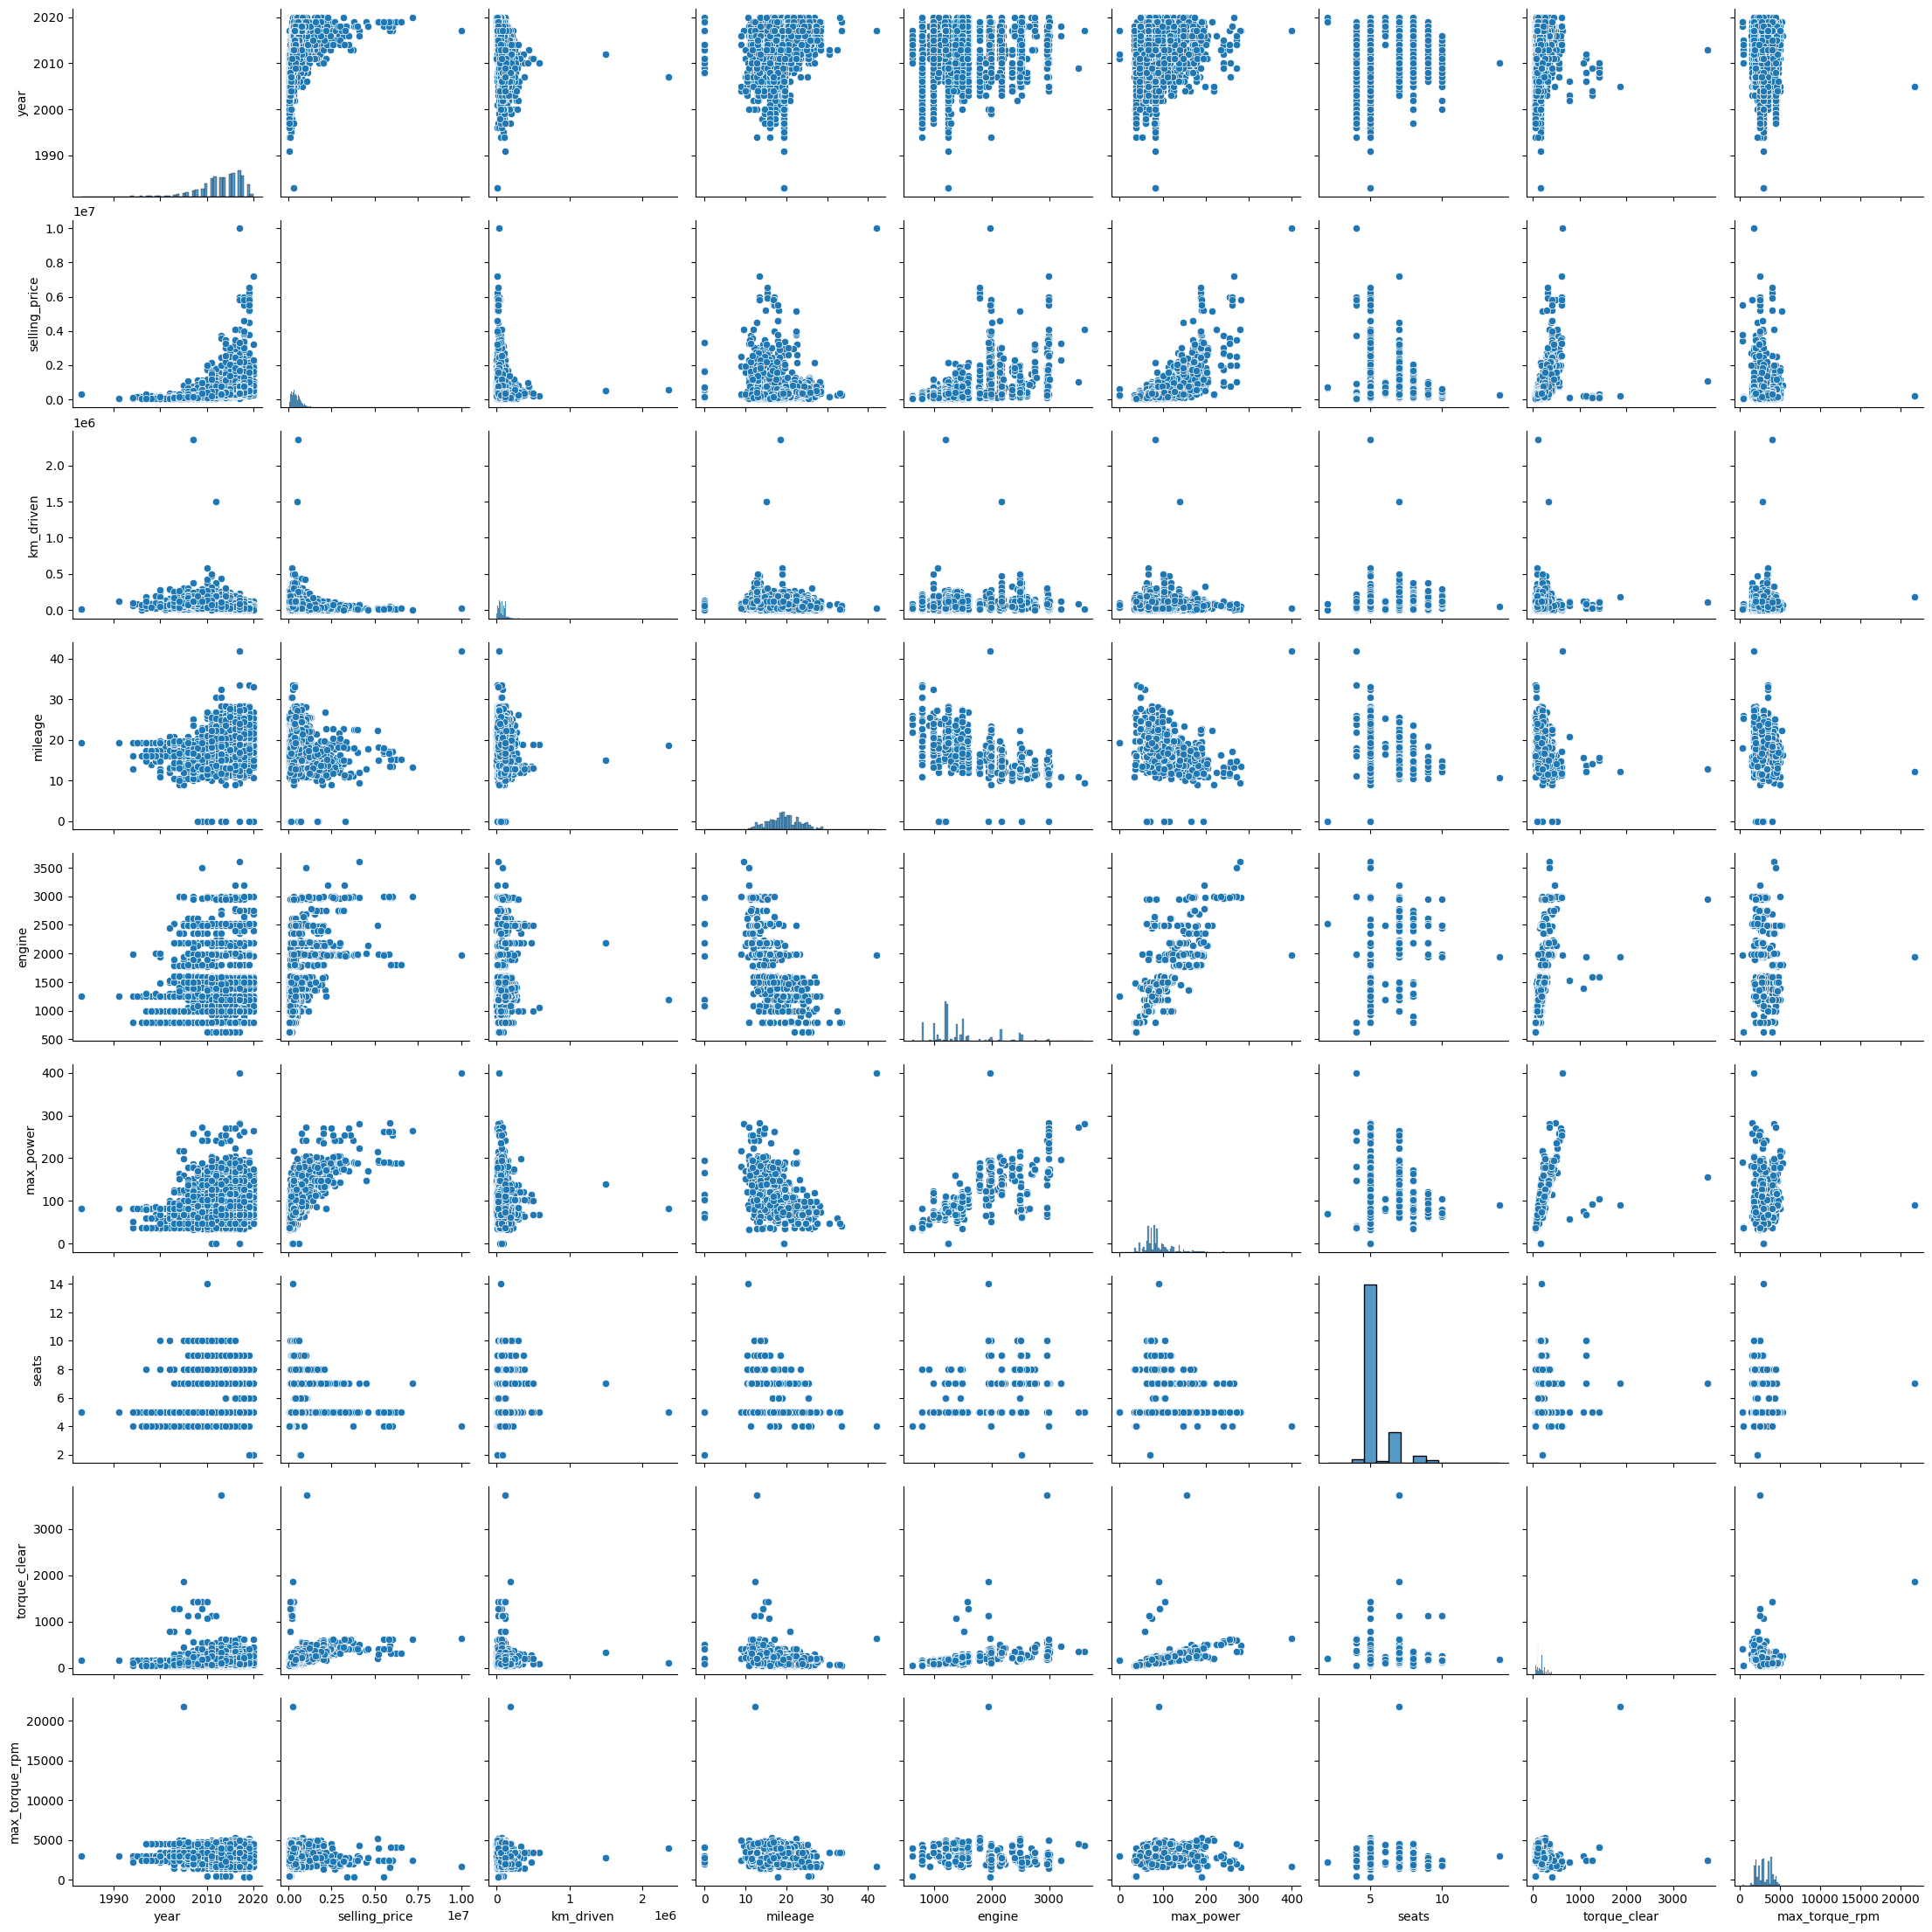

In [41]:
sns.pairplot(df_train[num_features_df_train]);

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.

* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной? </font>

На этом графике видно, что есть линейная зависимость призанков с целевой переменной, например max_power, engine, torque_clear
и есть линейные зависимости между признаками, с чем предстоит разобраться 

* <font color='#FF6600'> А о корреляциях признаков? </font>

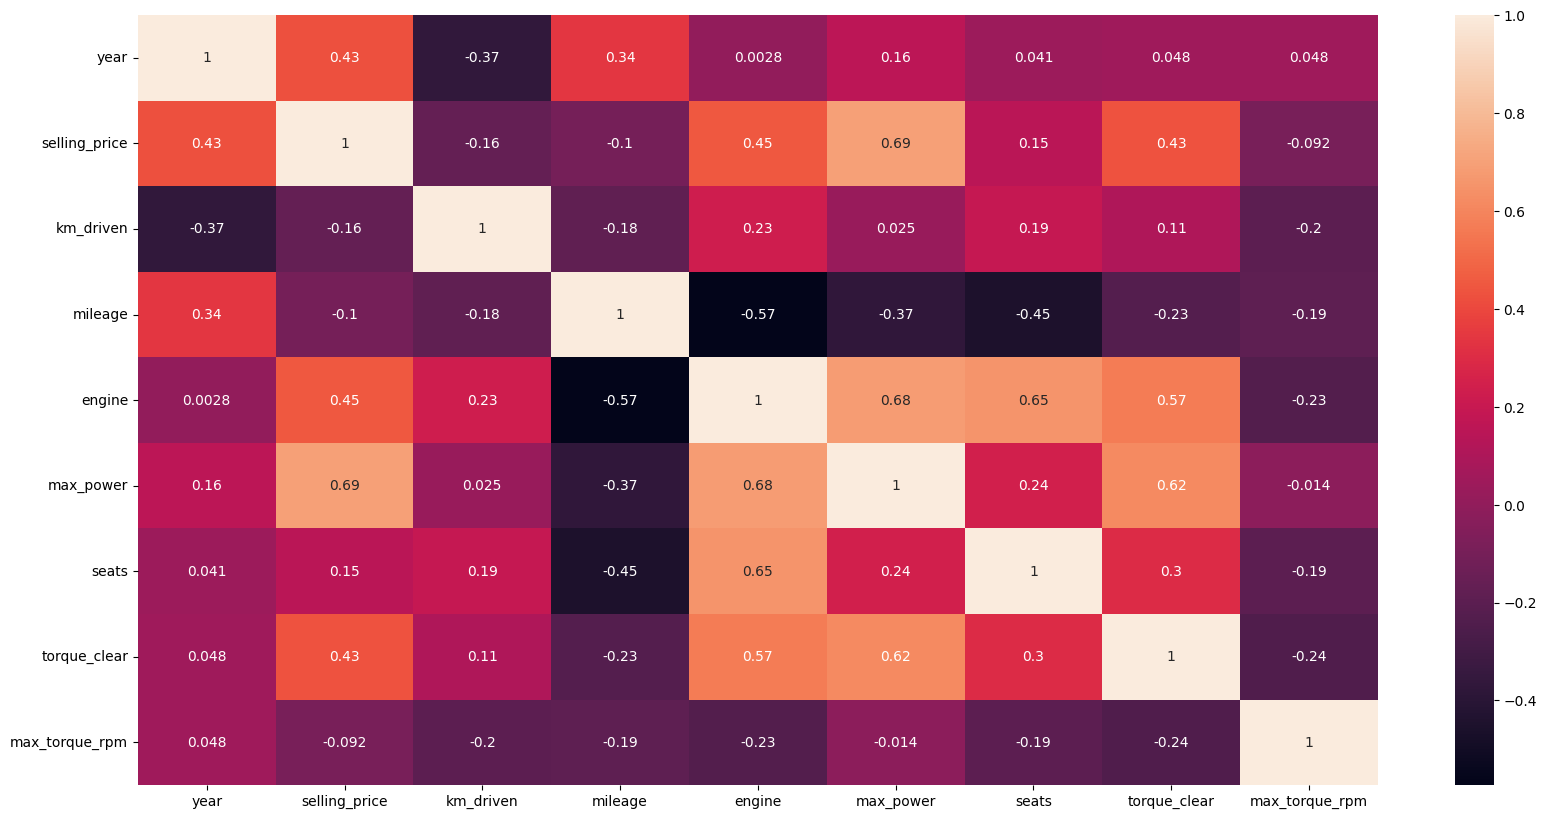

In [41]:
# для ответа на вопрос лучше построить матрицу корреляций
int_float_features = df_train[num_features_df_train]
corr_matrix_int_float = int_float_features.corr()
figure, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr_matrix_int_float, annot=True, ax=ax);

Исходя из данного графика можно сделать вывод о том, что у целевой переменной есть существенная линейная связь с такими признаками:
* year
* engine
* max_power
* torque_clear


Вместе с этим, присутствуют сильные линейные взаимосвязи между признаками:
* km_driven - year
* mileage - year
* engine - mileage
* max_power - mileage
* seats - mileage
* engine - max_power
* engine - seats
* engine - torque_clear
* torque_clear - max_power

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

В целом, распределение признаков в train и test схожи, но по некоторым признакам сильно отличается дисперсия. Например, по признаку max_torque_rpm. Возможно это связано с большим количеством наблюдений в train и соответственно большей их "собранности" вокрун среднего значения этого признака

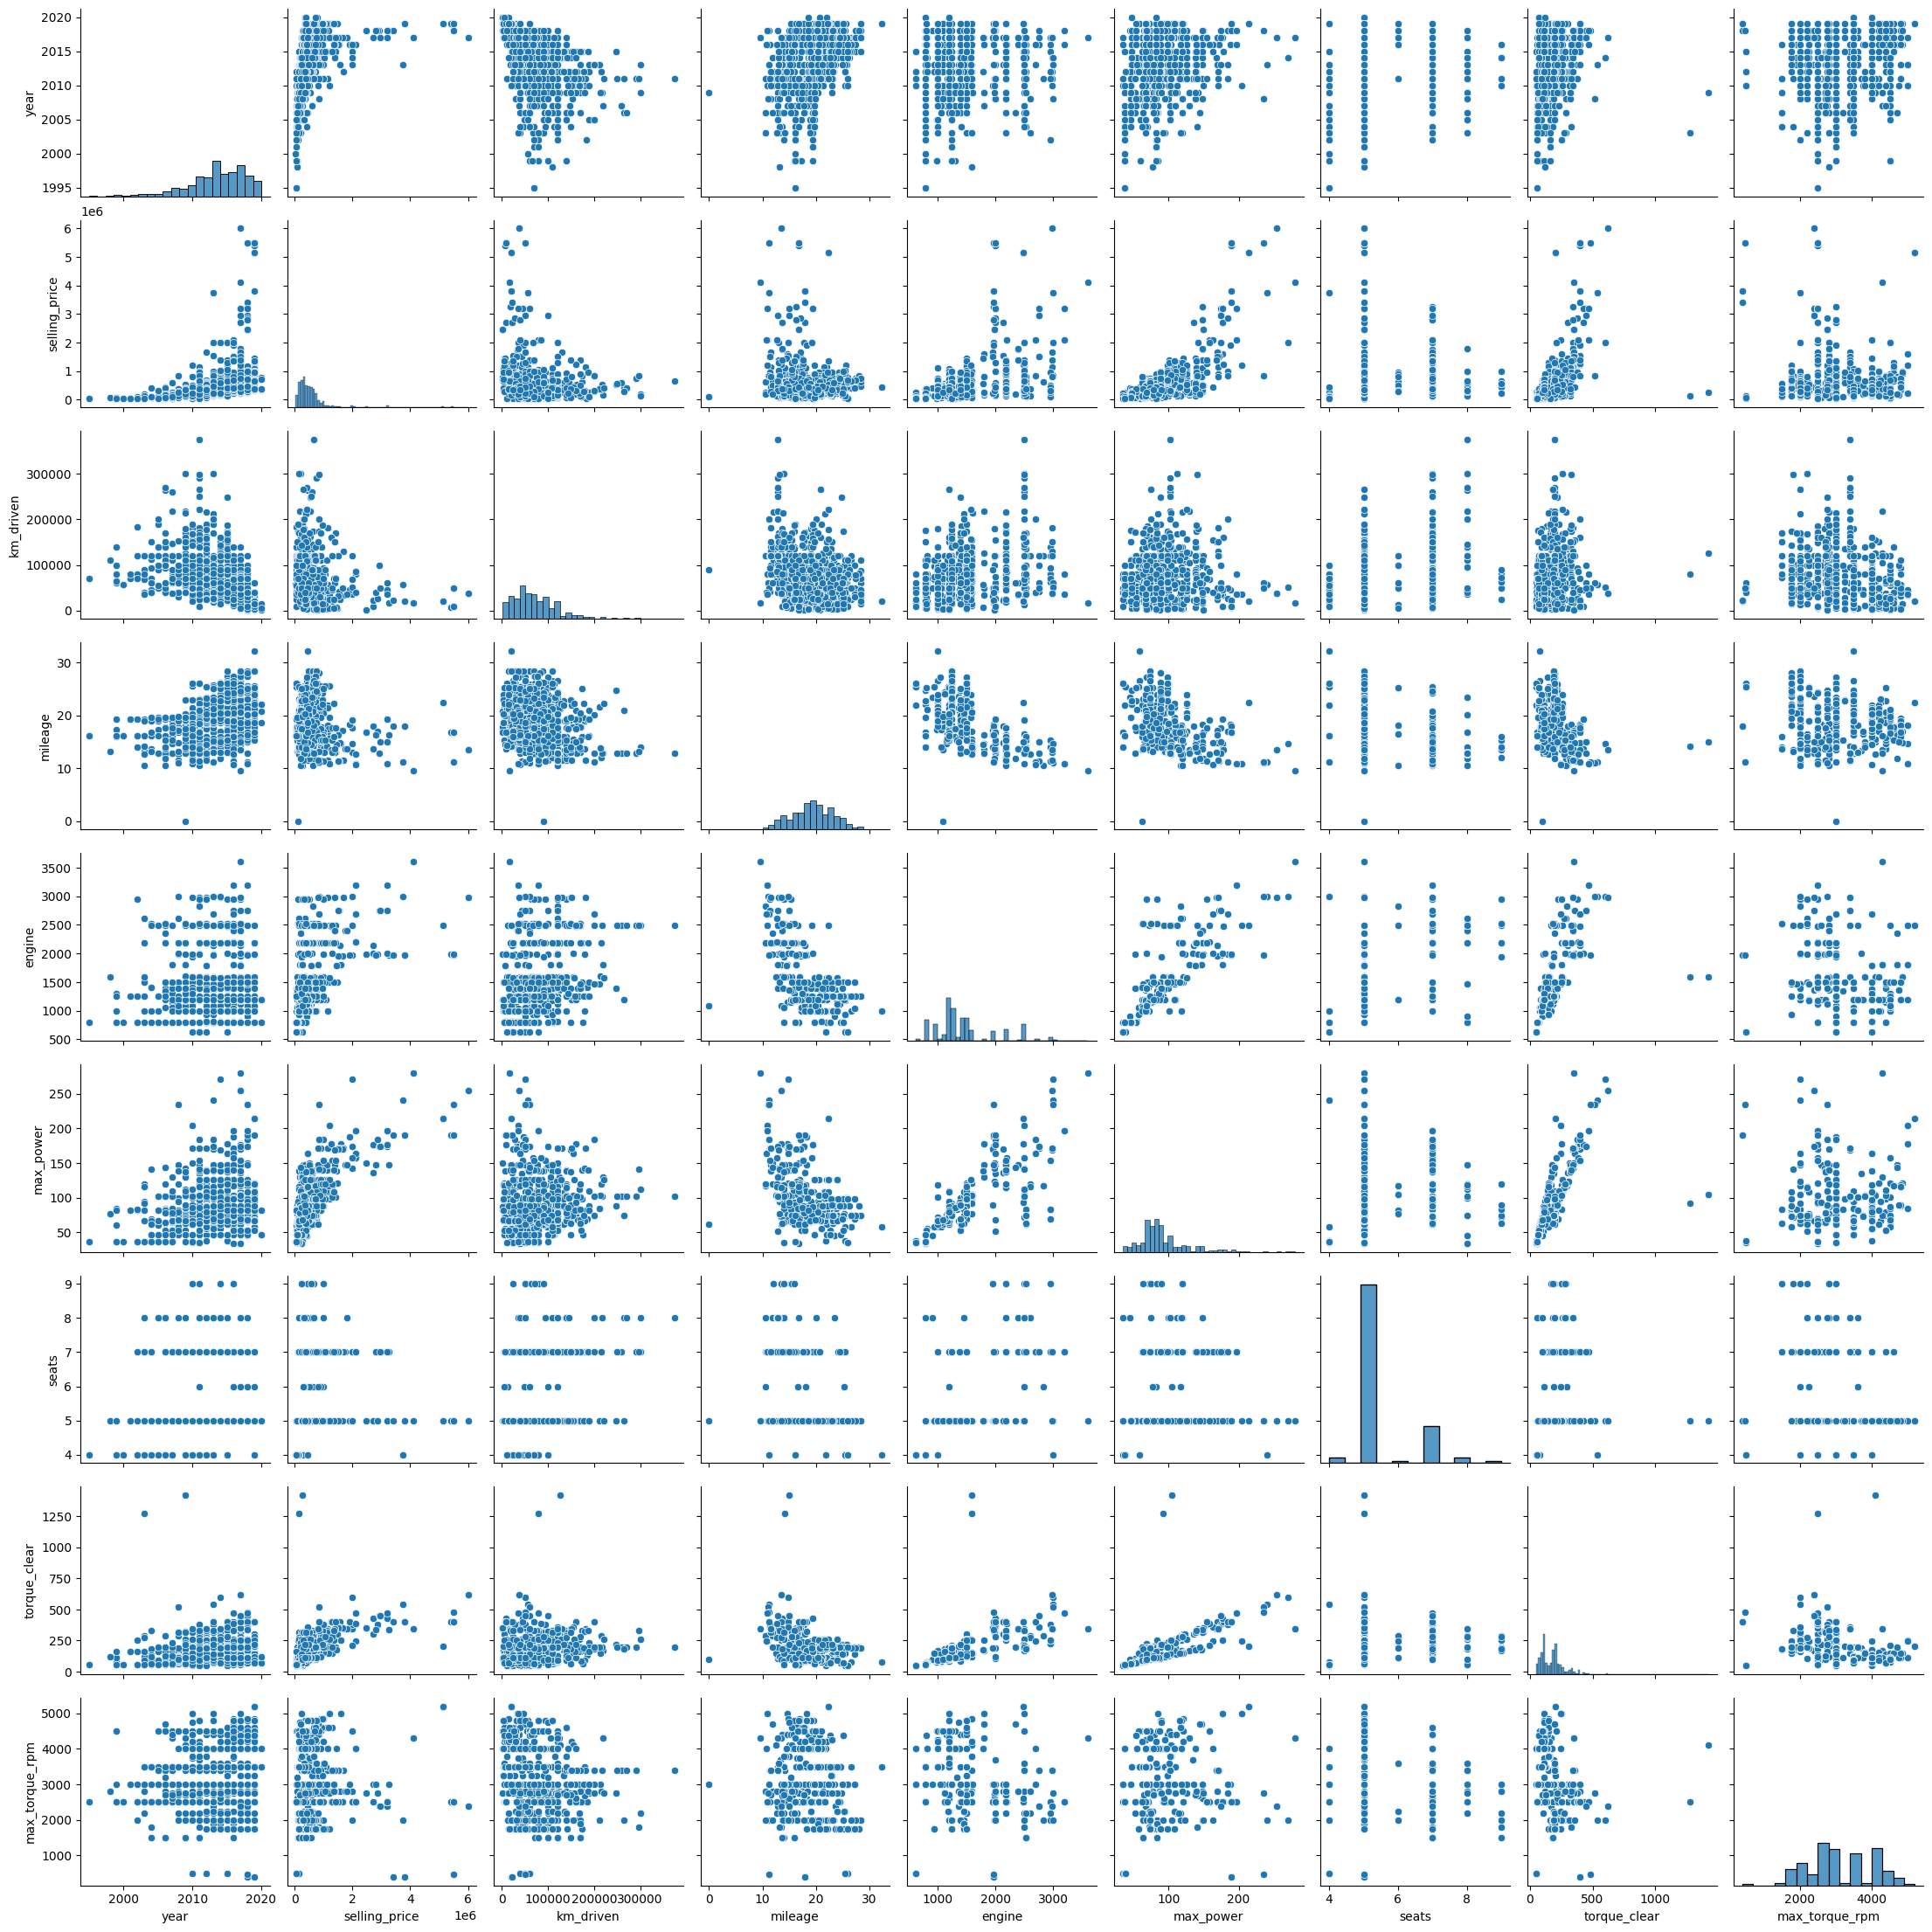

In [42]:
# список числовых признаков в df_train
num_features_df_test = [i for i in df_test.columns if (df_test[i].dtype == 'int') | (df_test[i].dtype == 'float')]
sns.pairplot(df_test[num_features_df_test]);

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

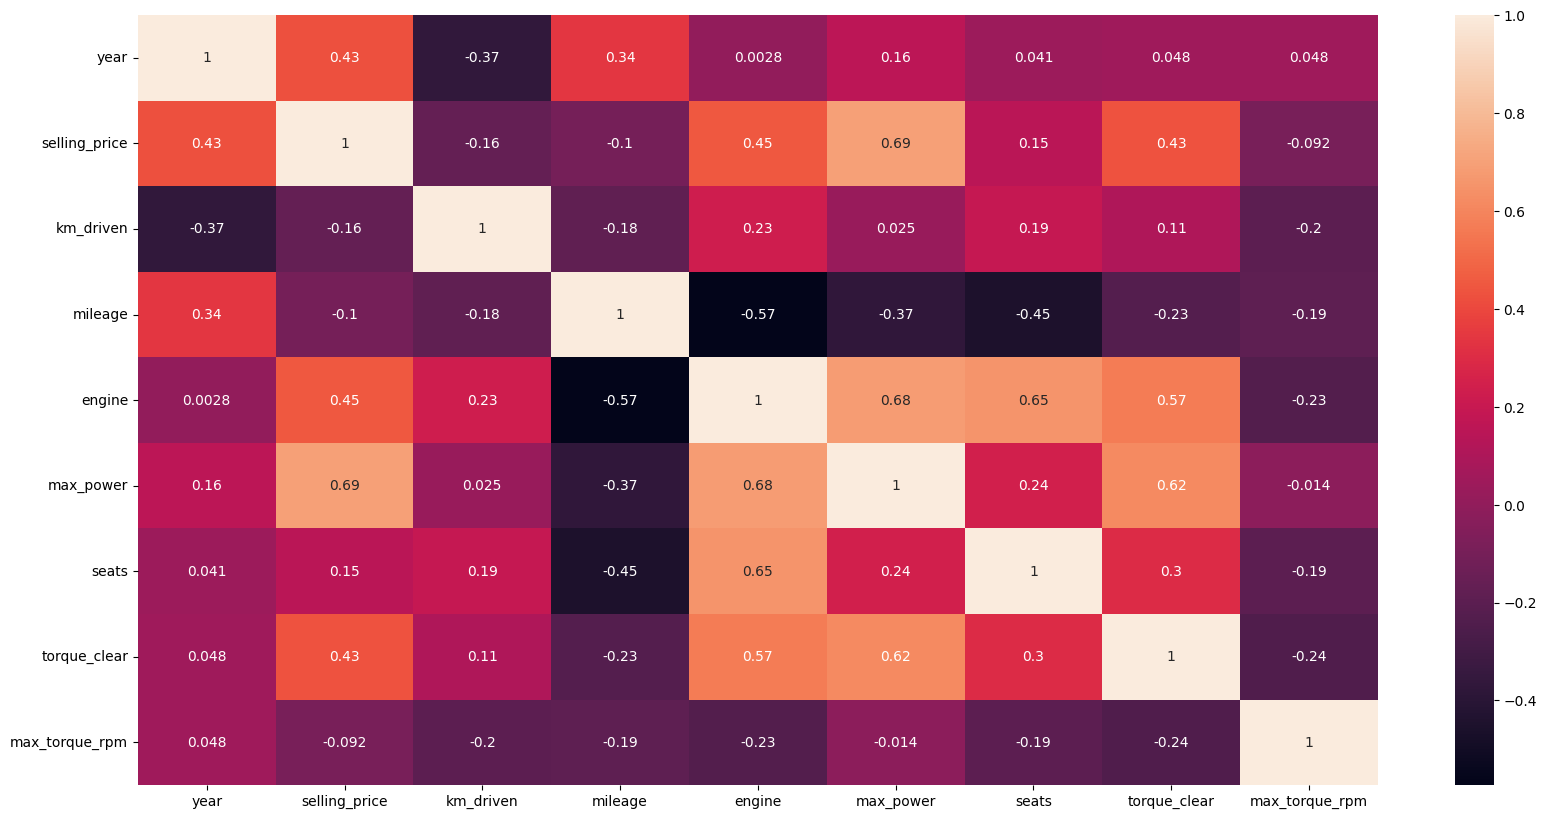

In [69]:
# еще раз строю тепловую карту корреляции
figure, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr_matrix_int_float, annot=True, ax=ax);

Ответьте, пожалуйста, на вопросы: 

* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>

Ответ: max_power и max_torque_rpm

* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>

Ответ: 
* max_power - selling_price
* max_power - engine
* seats - engine
* torque_clear - max_power
* torque_clear - engine
* selling_price - engine
* selling_price - torque_clear
* selling_price - year

* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

Ответ: судя по данным можно сделать такой вывод, визуально эта взаимосвязь особенно хорошо прослеживается в тестовых данных 

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

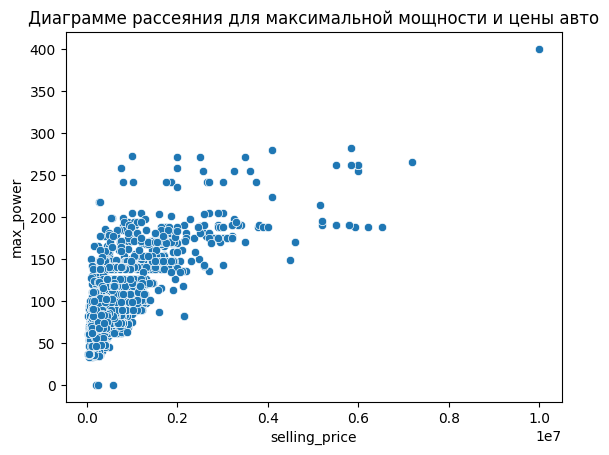

In [50]:
sns.scatterplot(data= df_train, x= "selling_price", y= "max_power").set(title= 'Диаграммe рассеяния для максимальной мощности и цены авто');

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

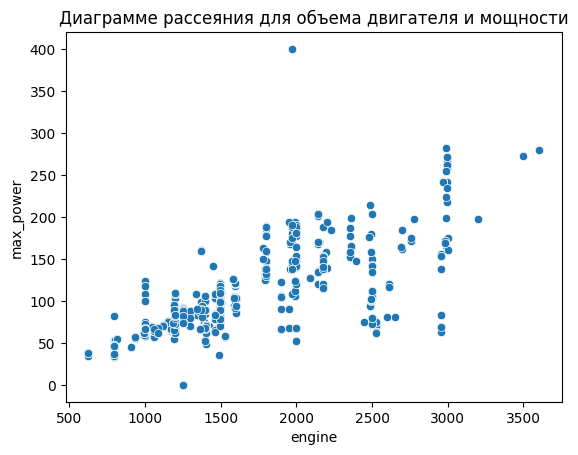

In [49]:
sns.scatterplot(data= df_train, x= "engine", y= "max_power").set(title= 'Диаграммe рассеяния для объема двигателя и мощности');

Интересно посмотреть хорошую линейную зависимость между объемом двигателя и мощностью двигателя

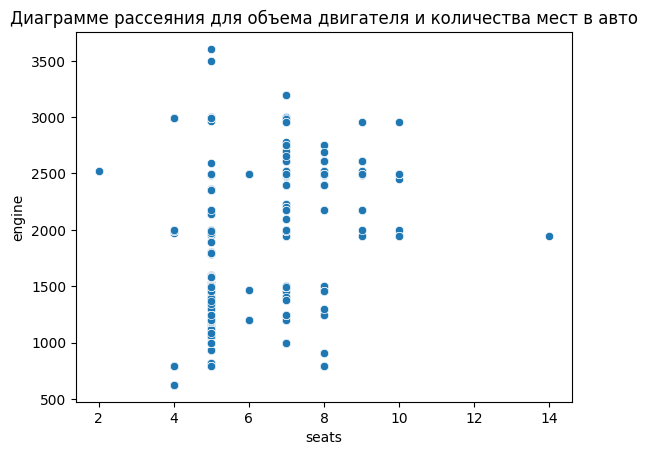

In [55]:
sns.scatterplot(data= df_train, x= "seats", y= "engine").set(title= 'Диаграммe рассеяния для объема двигателя и количества мест в авто');

На этом графике любопытно то, что коэфф. корреляции указывает на хорошую прямую линейную связь (чем больше количество мест, тем больше объем дв.), но на графике явно об этом сказть нельзя.  Посмотрим на гистограмму распределние признака seats: 

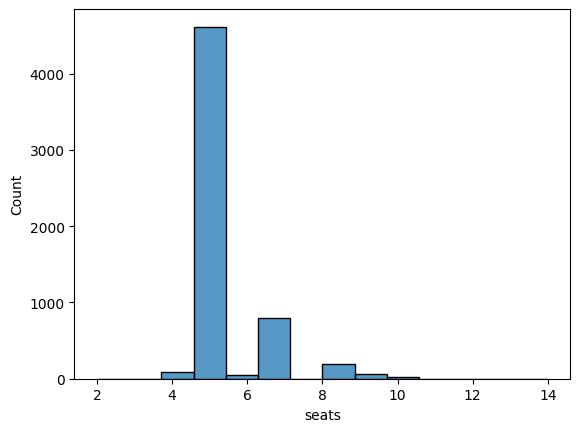

In [58]:
sns.histplot(data= df_train, x= "seats");

Предполагаю, что такой эффект возник из-за преобладания авто с количеством 5 и больше, поэтому на высокий коэфф. корр. я бы не расчитывал.

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [63]:
y_train = df_train['selling_price']

X_train = df_train.drop(object_features_df_train, axis=1)
X_train.drop(['selling_price'], axis=1, inplace= True)

In [67]:
# assert X_train.shape == (5840, 6)
assert X_train.shape == (5840, 8)

In [68]:
y_test = df_test['selling_price']
X_test = df_test.drop(object_features_df_train, axis=1)
X_test.drop(['selling_price'], axis=1, inplace= True)

In [69]:
# assert X_test.shape == (1000, 6)
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

reg = LinearRegression()

reg.fit(X_train, y_train)

print(f"Train MSE for LinearRegression: {round(MSE(reg.predict(X_train), y_train), 2)}.\nTest MSE score for LinearRegression: {round(MSE(reg.predict(X_test), y_test), 2)}.")
print()
print(f"Train R2 score for LinearRegression: {round(r2_score(reg.predict(X_train), y_train), 2)}.\nTest R2 score for LinearRegression: {round(r2_score(reg.predict(X_test), y_test), 2)}.")

Train MSE for LinearRegression: 113903879179.88.
Test MSE score for LinearRegression: 226616426956.54.

Train R2 score for LinearRegression: 0.34.
Test R2 score for LinearRegression: -0.09.


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [ ]:
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()
X_train_scaller = pd.DataFrame(scaller.fit_transform(X_train))



# возвращаю названия колонкам после заполнения пропусков 
for dq_c, df_c in zip(__.columns.to_list(), __.columns.to_list()):
    __.rename(columns = {dq_c : df_c}, inplace = True)

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [ ]:
# your code here

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [ ]:
from sklearn.linear_model import Lasso

# your code here

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [ ]:
# your code here

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
from sklearn.model_selection import GridSearchCV

# your code here

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [ ]:
# your code here

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [ ]:
from sklearn.linear_model import ElasticNet

# your code here

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [ ]:
# your code here

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [ ]:
# your code here

In [ ]:
assert X_train_cat.shape == (5840, 10)

In [ ]:
X_train_cat.describe(include='object')

(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [ ]:
def business_metrics(y_true, y_pred):
    # your code here

business_metrics(# your code here)

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link